In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import GradientBoostingRegressor as GBR
#from sklearn import linear_model
#from sklearn.svm import SVR,SVC 
from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
#from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#from sklearn.neural_network import MLPRegressor,MLPClassifier
#from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge#岭回归，ridge，其余不变，优势在于小的数据集
#from sklearn.svm import SVC
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import NuSVC
#from sklearn.svm import LinearSVC
import xgboost as xgb

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data = pd.read_excel('ZM-ML_Data.xlsx')
X = data.iloc[:,1:41]
Y = data.iloc[:,41]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
std = StandardScaler()
X_train_std = std.fit_transform(x_train)
X_test_std = std.transform(x_test)

D:\app\anaconda\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.0)
  from scipy.sparse import csr_matrix, issparse


In [2]:
#模型 
param_test1 =  {'learning_rate': [0.1,0.25,0.5,0.6],
              'n_estimators': [500,600,700,800],
              'max_depth': [3,5,7,9,10], 
              'min_child_weight': [1,2,3,4], 
              'subsample': [0.3,0.6,0.9,1,1.2],
              'colsample_bytree': [0.4,0.6,0.8,1],
              'gamma': [0,0.1], 
               'reg_alpha': [0,0.1,0.2,0.4], 
               'reg_lambda': [0,0.05,0.1],
   }
model = xgb.sklearn.XGBRegressor()
grid_xgb = GridSearchCV(model,param_test1,scoring='neg_root_mean_squared_error',cv=10,verbose=2)
model.fit(X_train_std, y_train)         

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

0  折 RandomForestRegressor:    0.027057341523327096 

1  折 RandomForestRegressor:    0.011104777266779506 

2  折 RandomForestRegressor:    0.005874100557320421 

3  折 RandomForestRegressor:    0.005426718134185116 

4  折 RandomForestRegressor:    0.011284687909525646 

     R2: -0.160939
     MAE: 0.062043
     MSE: 0.007151
     RMSE:0.084563


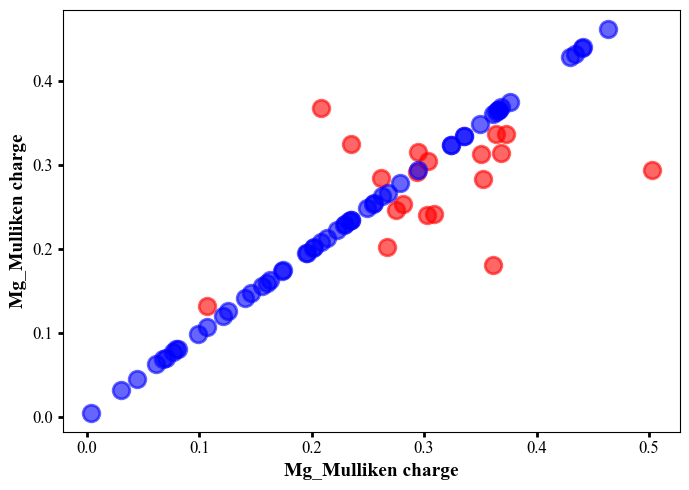

In [3]:
y_pred = model.predict(X_test_std)
y_pred_train = model.predict(X_train_std)

from sklearn.model_selection import KFold
KF = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(KF.split(X,Y)):
    train_data,test_data,train_target,test_target = X.iloc[train_index],X.iloc[test_index],Y.iloc[train_index],Y.iloc[test_index]
    model.fit(train_data, train_target)
    #score_train = metrics.mean_squared_error(train_target, model.predict(train_data))
    score_test = metrics.mean_squared_error(test_target, model.predict(test_data))
    #print(k, " 折", "RandomForestRegressor train MSE:   ", score_train)
    print(k, " 折", "RandomForestRegressor:   ", score_test, '\n')  

print("     R2: %f" % metrics.r2_score(y_test, y_pred))
print("     MAE: %f" % metrics.mean_absolute_error(y_test, y_pred))
print("     MSE: %f" % metrics.mean_squared_error(y_test, y_pred))
print("     RMSE:%f" % math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

%matplotlib inline

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(y_test,y_pred,'o',color='r',alpha=0.6,markersize='12',markeredgewidth=2)
ax.plot(y_train,y_pred_train,'o',color='b',alpha=0.6,markersize='12',markeredgewidth=2)

ax.set_xlabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')
ax.set_ylabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')

plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

sol_Ɛ 0.22266304
sol_C-O 0.19505565
ani_ESPmin 0.17584532
clu_differ-BL 0.1401309
sol_Pn 0.07828629
sol_ESPmin 0.03295143
clu_BE 0.025182823
clu_ESPmin 0.018791506
clu_ESPmax 0.016179891
sol_Hn 0.015399295
sol_ESPmax 0.0138382455
clu_differ-MBO 0.013279263
sol_Cn 0.011552161
sol_μ 0.009969283
ani_Fn 0.009960818
ani_Cn 0.005664937
differ_dE 0.005582234
sol_C=O 0.0055519207
sol_On 0.002877439
ani_ESPmax 0.0012024797
sol_NH 3.5078087e-05
ani_S-O 0.0
sol_N 0.0
sol_Sn 0.0
sol_Nn 0.0
sol_Sin 0.0
ani_P-F 0.0
sol_S=O 0.0
sol_P-O 0.0
sol_NH2 0.0
ani_CF3 0.0
sol_P=O 0.0
sol_Si-N 0.0
ani_Nn 0.0
ani_Sn 0.0
ani_Pn 0.0
ani_N 0.0
ani_S=O 0.0
ani_S-N 0.0
ani_On 0.0


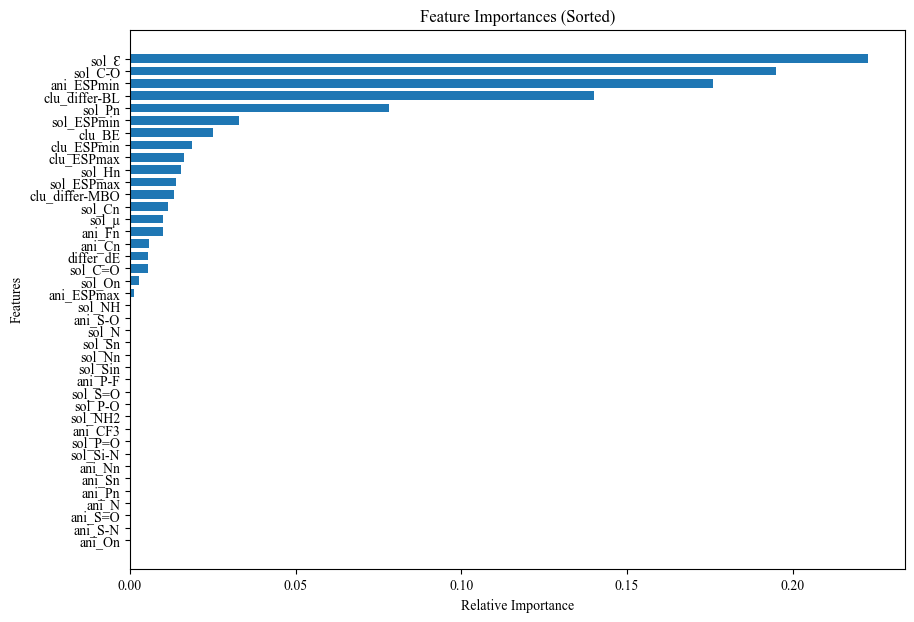

In [6]:
# 重要性
column = data.columns.tolist()[1:41]
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_columns = [column[i] for i in sorted_indices]

# 打印排序后的特征重要性和对应的列名
for a, b in zip(sorted_columns, feature_importances[sorted_indices]):
    print(a, b)

# 绘制特征重要性条形图
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.figure(figsize=(10, 7))
plt.barh(sorted_columns, feature_importances[sorted_indices], height=0.7)
plt.xlabel('Relative Importance')  # x 轴
plt.ylabel('Features')  # y轴
plt.title('Feature Importances (Sorted)')  # 标题
plt.gca().invert_yaxis()  # 反转y轴，使得重要性从高到低显示
plt.show()

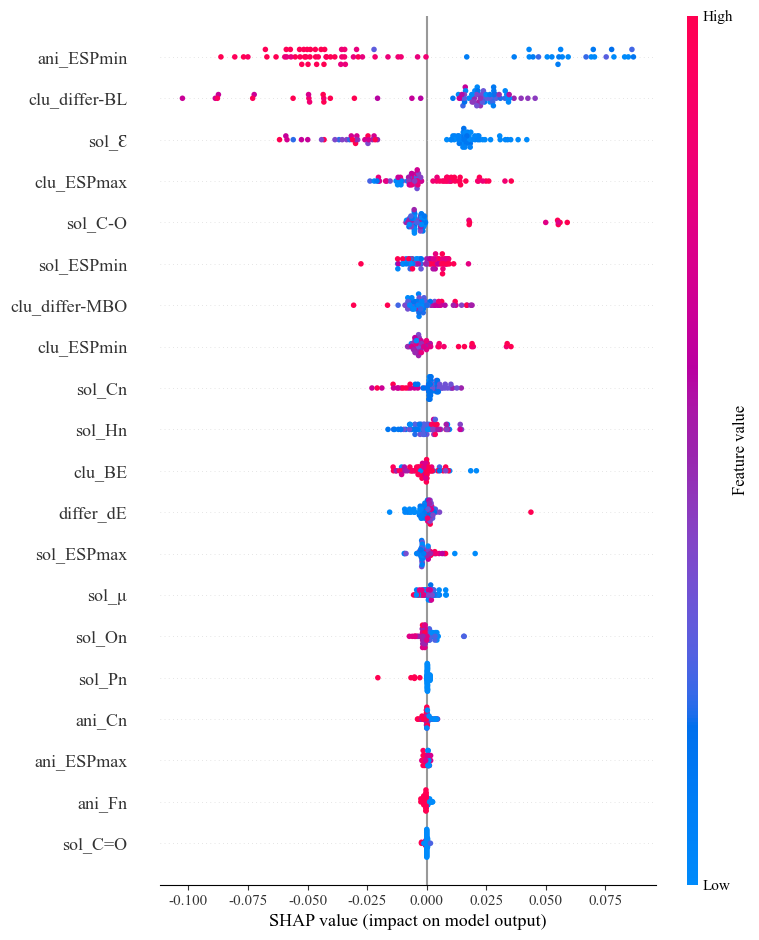

In [5]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X) 
shap.summary_plot(shap_values, X)